In [1]:
import numpy as np 
import pandas as pd

In [2]:
train_data = pd.read_csv('./titanic/train.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test_data = pd.read_csv('./titanic/test.csv')
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
train_data.drop(columns='PassengerId',axis=1,inplace=True)

# Survived와 상관계수의 절대값이 가장 작았던 SibSp삭제
train_data.drop(columns='SibSp',axis=1,inplace=True)
train_data

,Survived,Pclass,Name,Sex,Age,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,111369,30.0000,C148,C


In [5]:
train_data['Embarked'].fillna('S',inplace=True)

# 이후 모델을 돌리기 위하여 Embarked 숫자로 변경 {'S': 0 ,'C': 1 , 'Q' : 2 } 
train_data['Embarked'].replace({'S': 0 ,'C': 1 , 'Q' : 2 },inplace=True)

# null값이 너무 많은 Cabin 제거
train_data.drop(columns='Cabin',axis=1,inplace=True)

# Sex 숫자로 변경 {'male':0,'female':1}
train_data['Sex'].replace({'male': 0 ,'female': 1 },inplace=True)


In [6]:
train_data.drop(columns='Name',axis=1,inplace=True)

# Ticket 은 Pclass와 관련있는 것 같지만 확실하지 않으므로 삭제
train_data.drop(columns='Ticket',axis=1,inplace=True)
train_data

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,0,22.0,0,7.2500,0
1,1,1,1,38.0,0,71.2833,1
2,1,3,1,26.0,0,7.9250,0
3,1,1,1,35.0,0,53.1000,0
4,0,3,0,35.0,0,8.0500,0
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,13.0000,0
887,1,1,1,19.0,0,30.0000,0
888,0,3,1,NaN,2,23.4500,0
889,1,1,0,26.0,0,30.0000,1


In [7]:
train_data.drop(columns='Parch',axis=1,inplace=True)

In [8]:
train_data.drop(columns='Age',axis=1,inplace=True)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from sklearn.preprocessing import StandardScaler


In [10]:
ss=StandardScaler()
f=train_data.loc[:,['Fare']]
ss.fit(f)
a = pd.DataFrame(ss.transform(f),columns=f.columns)
sc_train_data=train_data.copy()
sc_train_data['Fare']=a.loc[:,'Fare']
sc_train_data

,Survived,Pclass,Sex,Fare,Embarked
0,0,3,0,-0.502445,0
1,1,1,1,0.786845,1
2,1,3,1,-0.488854,0
3,1,1,1,0.420730,0
4,0,3,0,-0.486337,0
...,...,...,...,...,...
886,0,2,0,-0.386671,0
887,1,1,1,-0.044381,0
888,0,3,1,-0.176263,0
889,1,1,0,-0.044381,1


In [11]:
X=sc_train_data.drop(columns='Survived',axis=1)
y=y_AN=train_data.iloc[:,0]


In [12]:
train_X,test_X,train_y,test_y = \
train_test_split(X,y,test_size=0.2)


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,VotingClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC


In [14]:
classifiers = [DecisionTreeClassifier(),
               RandomForestClassifier(),
               GaussianNB(),
               KNeighborsClassifier(),
               SVC(kernel='linear'),
               SVC(kernel='rbf'),
               AdaBoostClassifier(),
               QuadraticDiscriminantAnalysis(),
               VotingClassifier(estimators=[('1',AdaBoostClassifier()),
                                            ('2',RandomForestClassifier()),
                                            ('3',SVC(kernel='linear'))]),
               BaggingClassifier(base_estimator=SVC(kernel='linear'),
                                 n_estimators=10)]

classifier_names = ['D_tree',
                    'RF',
                    'GNB',
                    'KNN',
                    'Ada',
                    'QDA',
                    'SVM_1',
                    'SVM_k',
                    'voting',
                    'bagging'
                    ]

Train D_tree : 81.47 %
Test D_tree : 81.01 %
Train RF : 80.05 %
Test RF : 82.12 %
Train GNB : 77.09 %
Test GNB : 77.09 %
Train KNN : 80.62 %
Test KNN : 78.21 %
Train Ada : 78.37 %
Test Ada : 79.89 %
Train QDA : 79.08 %
Test QDA : 81.56 %
Train SVM_1 : 78.81 %
Test SVM_1 : 80.45 %
Train SVM_k : 79.09 %
Test SVM_k : 79.89 %
Train voting : 80.19 %
Test voting : 82.68 %
Train bagging : 78.38 %
Test bagging : 79.89 %


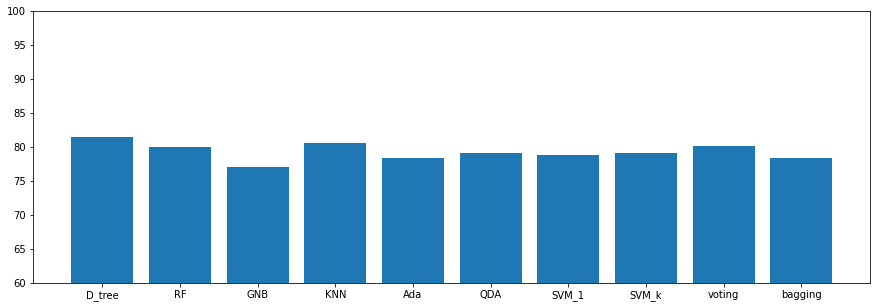

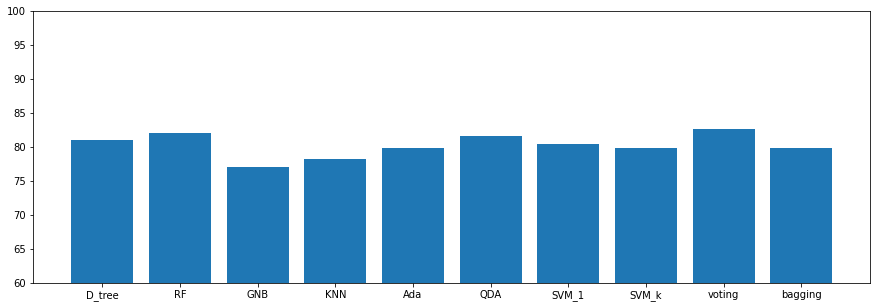

In [15]:
modelaccuracies = []
modelmeans = []
modelnames = []
y_pred = []

classifier_data = zip(classifier_names,classifiers)
for classifier_name,classifier in classifier_data:
  skf = StratifiedKFold(n_splits=10,shuffle=True)
  accuracies = cross_val_score(classifier, X=train_X,y=train_y,cv=skf)
  classifier.fit(train_X,train_y)
  y_pred.append(classifier.score(test_X,test_y)*100)
  print("Train",classifier_name,': {:.2f} %'.format(accuracies.mean()*100))
  print("Test",classifier_name,': {:.2f} %'.format(classifier.score(test_X,test_y)*100))
  modelaccuracies.append(accuracies)
  modelnames.append(classifier_name)
  modelmeans.append(accuracies.mean()*100)

plt.figure(figsize=(15,5))
plt.ylim([60,100])
plt.bar(modelnames,modelmeans)

plt.figure(figsize=(15,5))
plt.ylim([60,100])
plt.bar(modelnames,y_pred)

plt.show()

In [16]:
test_data.drop(columns=['Name','SibSp','Ticket','Cabin','Age','Parch'],axis=1,inplace=True)

# Embarked 숫자로 변경 {'S': 0 ,'C': 1 , 'Q' : 2 } 
test_data['Embarked'].replace({'S': 0 ,'C': 1 , 'Q' : 2 },inplace=True)

# Sex 숫자로 변경 {'male':0,'female':1}
test_data['Sex'].replace({'male': 0 ,'female': 1 },inplace=True)


In [17]:
test_data['Fare'].fillna(test_data['Fare'].median(),inplace=True)

In [18]:
f=test_data.loc[:,['Fare']]

a = pd.DataFrame(ss.transform(f),columns=f.columns)
sc_test_data=test_data.copy()
sc_test_data['Fare']=a.loc[:,'Fare']
sc_test_data

,PassengerId,Pclass,Sex,Fare,Embarked
0,892,3,0,-0.490783,2
1,893,3,1,-0.507479,0
2,894,2,0,-0.453367,2
3,895,3,0,-0.474005,0
4,896,3,1,-0.401017,0
...,...,...,...,...,...
413,1305,3,0,-0.486337,0
414,1306,1,1,1.544246,1
415,1307,3,0,-0.502445,0
416,1308,3,0,-0.486337,0


In [19]:
# 알고리즘 준비
v1 = VotingClassifier(estimators=[('1',AdaBoostClassifier()),
                                  ('2',RandomForestClassifier()),
                                  ('3',SVC(kernel='linear')),
                                 ('4',GaussianNB())])
# 알고리즘 학습
v1.fit(X,y)

# 영향이 없는 PassengerId값을 제외하고 예측하여 tX_AN에 저장
# y_pred1 = v1.predict(tX_AN.loc[:,['Pclass','Sex','Parch','Fare','Embarked']])
y_pred1 = v1.predict(sc_test_data.loc[:,['Pclass','Sex','Fare','Embarked']])
sc_test_data['Survived']=y_pred1

In [20]:
re= sc_test_data.loc[:,['PassengerId','Survived']]
re.set_index('PassengerId',inplace=True)
re.to_csv('./re.csv')